In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [4]:
train_data = pd.read_excel("/content/Data_Train.xlsx")
pd.set_option('display.max_columns', None)

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
29h 40m      1
5m           1
29h 30m      1
42h 5m       1
32h 20m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.dropna(inplace = True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
# EDA

In [11]:
# Day and Month of Journey Extraction

In [12]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [15]:
# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [18]:
# Since duration column is not in standard format of hour and min.
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [19]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins
train_data.drop(["Duration"], axis = 1, inplace = True)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [21]:
# Handling Categorical Data

In [22]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

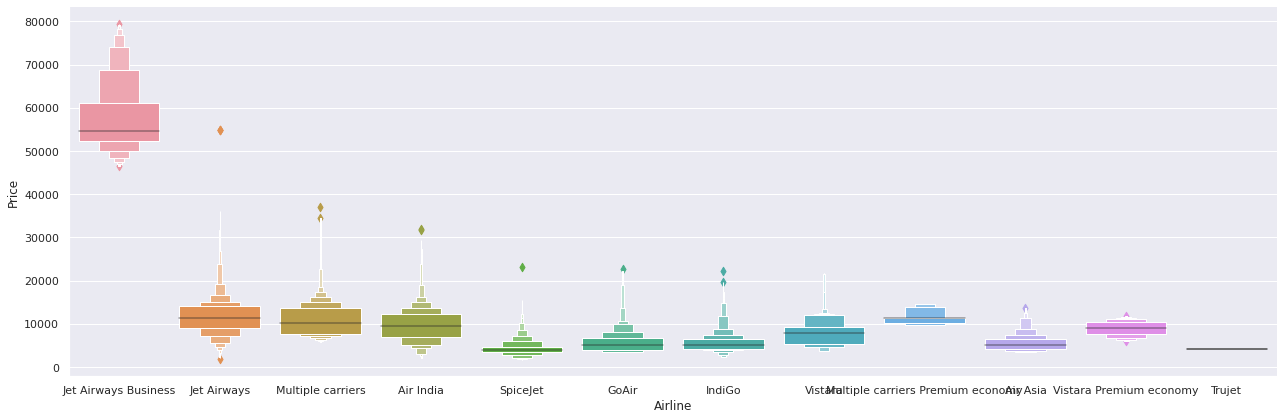

In [23]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [24]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

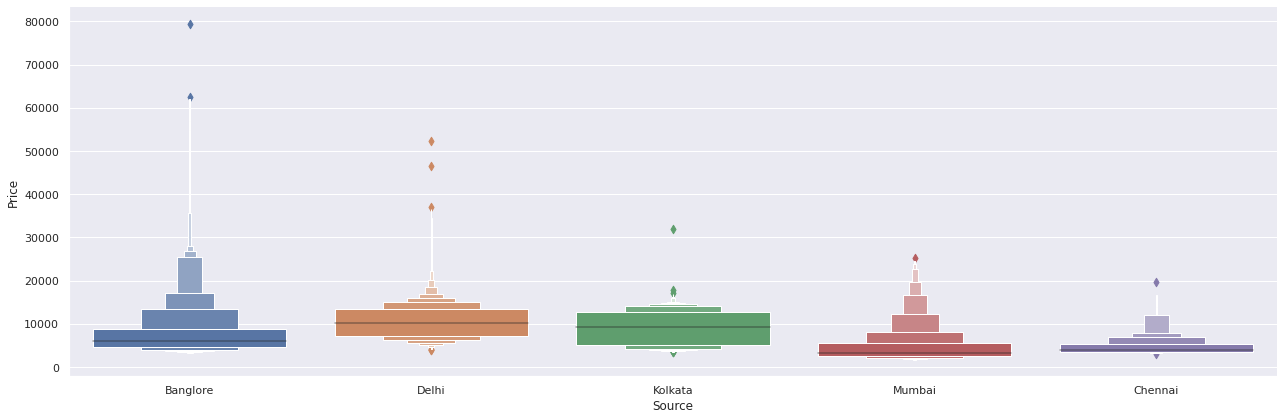

In [25]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [26]:
# One Hot Encoding 
airlines = pd.get_dummies(train_data['Airline'],drop_first=True)

In [27]:
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
source = train_data[['Source']] # Double bracket adds a prefix before the category
sources_ohe = pd.get_dummies(source,drop_first=True)

In [29]:
sources_ohe.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
destination = train_data[['Destination']]
destination_ohe = pd.get_dummies(destination,drop_first=True)
destination_ohe.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [31]:
# Route and Total Stops are conveying the same information so route is dropped 
train_data['Route'][1:25]

1     CCU → IXR → BBI → BLR
2     DEL → LKO → BOM → COK
3           CCU → NAG → BLR
4           BLR → NAG → DEL
5                 CCU → BLR
6           BLR → BOM → DEL
7           BLR → BOM → DEL
8           BLR → BOM → DEL
9           DEL → BOM → COK
10          DEL → BLR → COK
11                CCU → BLR
12                MAA → CCU
13          CCU → BOM → BLR
14                CCU → BLR
15    DEL → AMD → BOM → COK
16          DEL → PNQ → COK
17          DEL → BOM → COK
18    DEL → CCU → BOM → COK
19          DEL → BOM → COK
20          DEL → BOM → COK
21          BLR → COK → DEL
22                BLR → DEL
23                BLR → DEL
24          CCU → BOM → BLR
Name: Route, dtype: object

In [32]:
train_data['Total_Stops'][1:25]

1      2 stops
2      2 stops
3       1 stop
4       1 stop
5     non-stop
6       1 stop
7       1 stop
8       1 stop
9       1 stop
10      1 stop
11    non-stop
12    non-stop
13      1 stop
14    non-stop
15     2 stops
16      1 stop
17      1 stop
18     2 stops
19      1 stop
20      1 stop
21      1 stop
22    non-stop
23    non-stop
24      1 stop
Name: Total_Stops, dtype: object

In [33]:
# Most of the values in additional info is no info so it doesn't convey much sense
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [34]:
train_data.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [35]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [36]:
# Since Total Stops will not be nominal and will be ordinal, since less the stops less the price so there is some order
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
# Label Encoding
train_data = train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [38]:
# Concatenate all one hot encoding columns
df_train = pd.concat([train_data,airlines,sources_ohe,destination_ohe],axis=1)

In [39]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
df_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [41]:
df_train.head(15)

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,9,0,11,25,2,25,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6,1,11087,12,3,18,55,10,25,15,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,22270,1,3,8,0,5,5,21,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1,11087,12,3,8,55,10,25,25,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,1,8625,27,5,11,25,19,15,7,50,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [42]:
df_train.shape

(10682, 30)

In [43]:
# Calling Test Data and repeating Data preprocessing Steps for it
test_df = pd.read_excel('/content/Test_set.xlsx')

In [44]:
test_df.head()    

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
test_df.shape

(2671, 10)

In [46]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [47]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [48]:
test_df["Journey_day"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.day
test_df["Journey_month"] = pd.to_datetime(test_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)
# Extracting Hours
test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour

# Extracting Minutes
test_df["Dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
test_df.drop(["Dep_Time"], axis = 1, inplace = True)
# Extracting Hours
test_df["Arrival_hour"] = pd.to_datetime(test_df.Arrival_Time).dt.hour

# Extracting Minutes
test_df["Arrival_min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)
# Since duration column is not in standard format of hour and min.
duration = list(test_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
test_df["Duration_hours"] = duration_hours
test_df["Duration_mins"] = duration_mins
test_df.drop(["Duration"], axis = 1, inplace = True)    
airlines = pd.get_dummies(test_df['Airline'],drop_first=True)
source = test_df[['Source']] # Double bracket adds a prefix before the category
sources_ohe = pd.get_dummies(source,drop_first=True)
destination = test_df[['Destination']]
destination_ohe = pd.get_dummies(destination,drop_first=True)
test_df.drop(['Additional_Info','Route'],axis=1,inplace=True)
test_df = test_df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
test_df = pd.concat([test_df,airlines,sources_ohe,destination_ohe],axis=1)
test_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [50]:
test_df.head(15)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,1,12,6,18,15,12,35,18,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6,1,12,3,7,30,22,35,15,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,1,5,15,15,20,30,5,15,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,15,3,10,10,12,55,2,45,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,1,18,5,16,30,22,35,6,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [51]:
# Preparing the X and y data from train
X = df_train.drop(['Price'],axis=1)

In [53]:
X.shape

(10682, 29)

In [54]:
y = df_train.iloc[:,1]

In [55]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

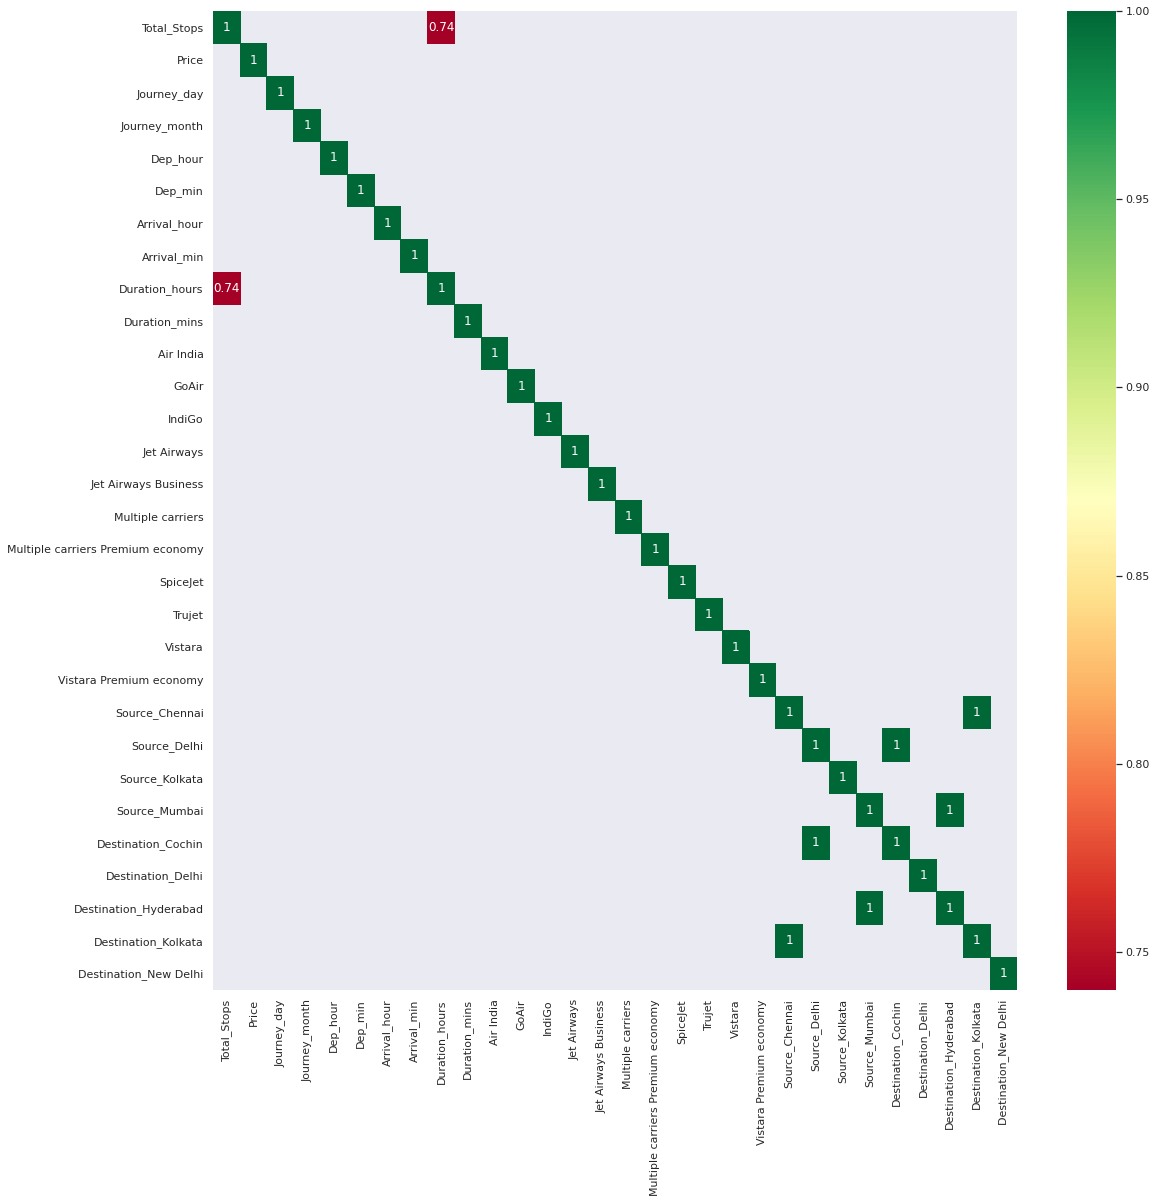

In [59]:
# Feature Selection
# Heatmap 
plt.figure(figsize=(18,18))
sns.heatmap(df_train.corr()[df_train.corr()>0.7],cmap='RdYlGn',annot=True)
plt.show()

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

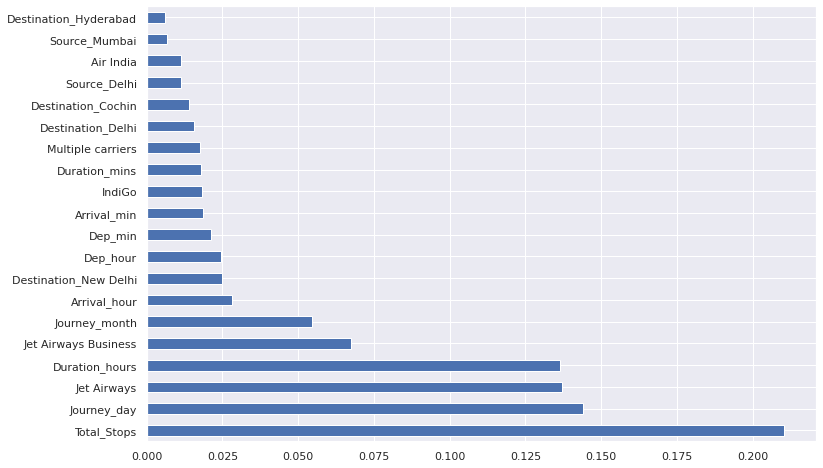

In [61]:
# Visualisation for Best k features using Extra Tree Regressor
plt.figure(figsize=(12,8))
feat_imp = pd.Series(selection.feature_importances_,index=X.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
X_train.shape

(8545, 29)

In [64]:
X_test.shape

(2137, 29)

In [65]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
y_pred = reg_rf.predict(X_test)

In [68]:
reg_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [69]:
reg_rf.score(X_train,y_train)

0.9527220004086323

In [70]:
reg_rf.score(X_test,y_test)

0.7979419801971772

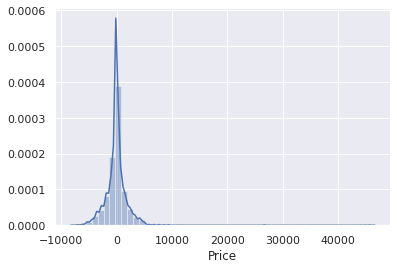

In [71]:
sns.distplot(y_test-y_pred)

In [72]:
# This shows the residual follows the normal distribution which confirms the normality of residual
# It means results are on the right track

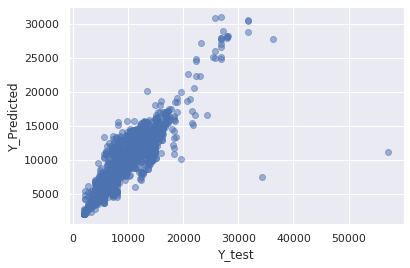

In [76]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('Y_test')
plt.ylabel('Y_Predicted')
plt.show()

In [77]:
# Metrics
from sklearn import metrics

In [78]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [79]:
print(mae,mse,rmse)

1174.53067753712 4356786.4037370635 2087.2916431914978


In [80]:
metrics.r2_score(y_test,y_pred)

0.7979419801971772

In [81]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

In [82]:
reg_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [83]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [84]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_leaf,
               'min_samples_leaf':min_samples_leaf}
               

In [85]:
randomcv = RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=1,random_state=42)

In [86]:
randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  17.3s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  17.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  17.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  17.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  17.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=  20.0s
[CV] n_estimators=1100, min_samples_split

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=  17.0s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=  17.0s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=  17.0s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=  16.9s
[CV] n_estimators=1100, min_samples_split=5

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [87]:
randomcv.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 900}

In [88]:
pred = randomcv.predict(X_test)

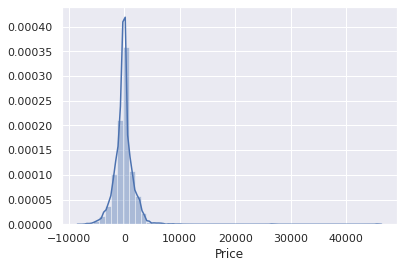

In [89]:
sns.distplot(y_test-pred)

In [90]:
r2_score = metrics.r2_score(y_test,pred)

In [91]:
r2_score

0.8147285851786727

In [92]:
import pickle

In [96]:
file = open('flight_price_rf.pkl','wb')
forest = pickle.dump(randomcv,file)